In [1]:
import sys, os
sys.path.insert(1, 'utils')

In [2]:
import time, os, json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
from operator import is_not
from functools import partial
%matplotlib inline

In [3]:
default_c = '#007CBE'

In [4]:
gptj_c = '#d00000'
gpt3_c = '#ffba08'
pr_c = '#8fe388'
kr_c = '#1b998b'
knn_c = '#3185fc'
nn_c = '#5d2e8c'
xg_c = '#ff7b9c'
rf_c = '#ff9b85'
gp_c = '#997b66'
true_c = '#cbff8c'

In [4]:
scatter_c = 'darkseagreen'

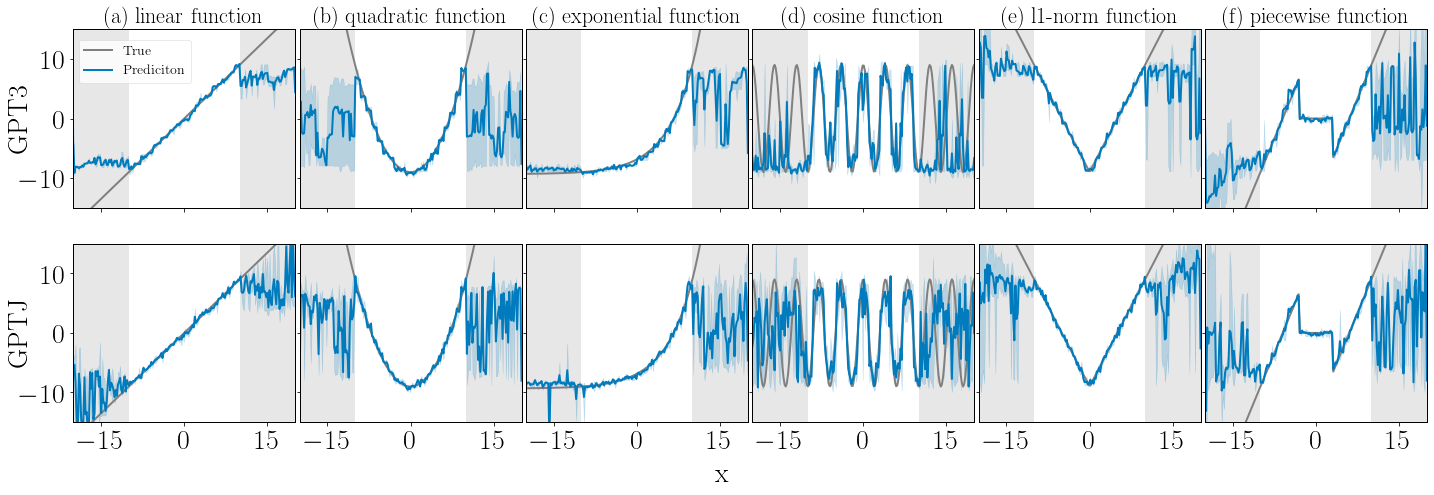

In [63]:
standard_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]
func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
width = 20
height = 7

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=2, ncols=6, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.05, bottom=.14, right=0.99, top=0.92, wspace=0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    file = standard_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    gptj_grid_y = []
    train_x, train_y = [], []
    for sim_idx in range(3):
        if i == 0:
            folder = os.path.join('y=5.1x','data_%d' %(sim_idx+1))
        else:
            folder = os.path.join('accuracy','data_%d' %(sim_idx+1))
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        gptj_grid_y.append(data_json['gptj_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    gptj_grid_y = np.array(gptj_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    if i == 0:
        true_grid_y = np.array(true_grid_y).reshape(-1)/5.1*0.9
        gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)/5.1*0.9
        gptj_grid_y = np.array(gptj_grid_y).reshape(-1)/5.1*0.9

        invalid_idx = gpt3_grid_y == None
        gpt3_grid_y = gpt3_grid_y[~invalid_idx]

        qr_grid_y = np.array(qr_grid_y).reshape(-1)/5.1*0.9
        krr_grid_y = np.array(krr_grid_y).reshape(-1)/5.1*0.9
        knn_grid_y = np.array(knn_grid_y).reshape(-1)/5.1*0.9
        nn_grid_y = np.array(nn_grid_y).reshape(-1)/5.1*0.9
        xg_grid_y = np.array(xg_grid_y).reshape(-1)/5.1*0.9
        rf_grid_y = np.array(rf_grid_y).reshape(-1)/5.1*0.9
        gp_grid_y = np.array(gp_grid_y).reshape(-1)/5.1*0.9
        train_y = np.array(train_y).reshape(-1)/5.1*0.9
        grid_y = np.array(grid_y).reshape(-1)/5.1*0.9
    
    # background color
    ax[0][i].set_facecolor('white')
    ax[0][i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
    ax[0][i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1) 
    ax[1][i].set_facecolor('white')
    ax[1][i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
    ax[1][i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1) 
    sns.color_palette("Set2")
    
    # plot lines
    # sns.lineplot(x = other_grid_x, y = lr_grid_y, label='LR', linewidth = 2, ax = ax[i])

#     sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = nn_grid_y, label='NN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[i])
    
    ax[0][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')
    ax[1][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')
    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, color = '#007CBE', label='Prediciton', linewidth = 2, ax = ax[0][i], palette = [gpt3_c])
    
    sns.lineplot(x = other_grid_x, y = gptj_grid_y, color = '#007CBE', label='Prediction', linewidth = 2, ax = ax[1][i], palette = [gpt3_c])
    
    ax[0][i].get_legend().remove()
    ax[0][i].set_title(func_list[i], fontsize = 22)
    ax[0][i].set_xlim(-20,20)
    ax[0][i].set_xticks([-15, 0, 15])
    ax[0][i].set_ylim(-15,15)

    
    ax[1][i].get_legend().remove()
    # ax[1][i].set_title(func_list[i], fontsize = 25)
    ax[1][i].set_xlim(-20,20)
    ax[1][i].set_xticks([-15, 0, 15])
    ax[1][i].set_ylim(-15,15)
    
ax[0][0].legend(fontsize = 14, bbox_to_anchor=(0.56, 0.66), ncol = 1)
# ax[0].legend(fontsize = 20, bbox_to_anchor=(0.2, 0.96), ncol = 1)
ax[0][0].set_ylabel('GPT3', labelpad = -13)
ax[1][0].set_ylabel('GPTJ', labelpad = -13)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
# fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig(os.path.join('figures','standard_1d_reg.pdf'))
None

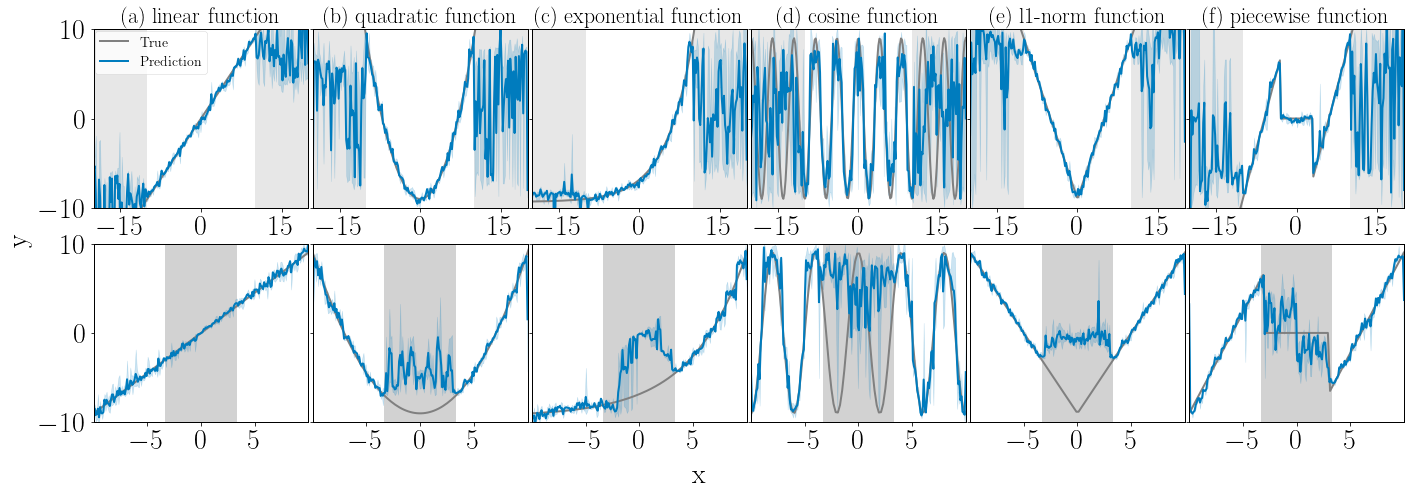

In [8]:
standard_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]
func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
width = 20
height = 7

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=2, ncols=6, sharex=False, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.08, bottom=.14, right=0.99, top=0.92, wspace=0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    file = standard_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    gptj_grid_y = []
    donut_gptj_grid_y = []
    donut_grid_x = []
    donut_grid_y = []
    donut_grid_x_ = []
    train_x, train_y = [], []
    for sim_idx in range(3):
        if i == 0:
            folder = os.path.join('y=5.1x','data_%d' %(sim_idx+1))
        else:
            folder = os.path.join('accuracy','data_%d' %(sim_idx+1))
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        gptj_grid_y.append(data_json['gptj_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
        
        with open(os.path.join('donut/data_%d/%s' % (sim_idx+1, file))) as f:
            donut_json = json.load(f)
        
        donut_gptj_grid_y.append(donut_json['gptj_grid_y'])
        donut_grid_x = np.array(donut_json['grid_x'])
        donut_grid_y = np.array(donut_json['grid_y'])

        donut_grid_x_.append(donut_grid_x)
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    donut_grid_x_ = np.array(donut_grid_x_).reshape(-1)
    donut_gptj_grid_y = np.array(donut_gptj_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    gptj_grid_y = np.array(gptj_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    if i == 0:
        true_grid_y = np.array(true_grid_y).reshape(-1)/5.1*0.9
        gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)/5.1*0.9
        gptj_grid_y = np.array(gptj_grid_y).reshape(-1)/5.1*0.9

        invalid_idx = gpt3_grid_y == None
        gpt3_grid_y = gpt3_grid_y[~invalid_idx]

        qr_grid_y = np.array(qr_grid_y).reshape(-1)/5.1*0.9
        krr_grid_y = np.array(krr_grid_y).reshape(-1)/5.1*0.9
        knn_grid_y = np.array(knn_grid_y).reshape(-1)/5.1*0.9
        nn_grid_y = np.array(nn_grid_y).reshape(-1)/5.1*0.9
        xg_grid_y = np.array(xg_grid_y).reshape(-1)/5.1*0.9
        rf_grid_y = np.array(rf_grid_y).reshape(-1)/5.1*0.9
        gp_grid_y = np.array(gp_grid_y).reshape(-1)/5.1*0.9
        train_y = np.array(train_y).reshape(-1)/5.1*0.9
        grid_y = np.array(grid_y).reshape(-1)/5.1*0.9
    
    # background color
    ax[0][i].set_facecolor('white')
    ax[0][i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
    ax[0][i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1) 
    
    
    ax[1][i].set_facecolor('white')
    ax[1][i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)    
    ax[1][i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)   
    sns.color_palette("Set2")
    
    # plot lines
    # sns.lineplot(x = other_grid_x, y = lr_grid_y, label='LR', linewidth = 2, ax = ax[i])

#     sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = nn_grid_y, label='NN', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[i])
#     sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[i])
    
    ax[0][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')
    ax[1][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')
    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    # sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, color = '#007CBE', label='Prediciton', linewidth = 2, ax = ax[0][i], palette = [gpt3_c])
    
    sns.lineplot(x = other_grid_x, y = gptj_grid_y, color = default_c, label='Prediction', linewidth = 2, ax = ax[0][i], palette = [gpt3_c])
    sns.lineplot(x = donut_grid_x_, y = donut_gptj_grid_y, color = default_c, label='Prediction', linewidth = 2, ax = ax[1][i], palette = [gpt3_c])
    
    ax[0][i].get_legend().remove()
    ax[0][i].set_title(func_list[i], fontsize = 22)
    ax[0][i].set_xlim(-20,20)
    ax[0][i].set_xticks([-15, 0, 15])
    ax[0][i].set_ylim(-15,15)

    
    ax[1][i].get_legend().remove()
    # ax[1][i].set_title(func_list[i], fontsize = 25)
    ax[1][i].set_xlim(-10,10)
    ax[1][i].set_xticks([-5, 0, 5])
    ax[1][i].set_ylim(-10,10)
    
ax[0][0].legend(fontsize = 14, bbox_to_anchor=(0.56, 0.71), ncol = 1)
# ax[0].legend(fontsize = 20, bbox_to_anchor=(0.2, 0.96), ncol = 1)
# ax[0][0].set_ylabel('', labelpad = -13)
# ax[1][0].set_ylabel('', labelpad = -13)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig(os.path.join('figures','in_ex.pdf'))
None

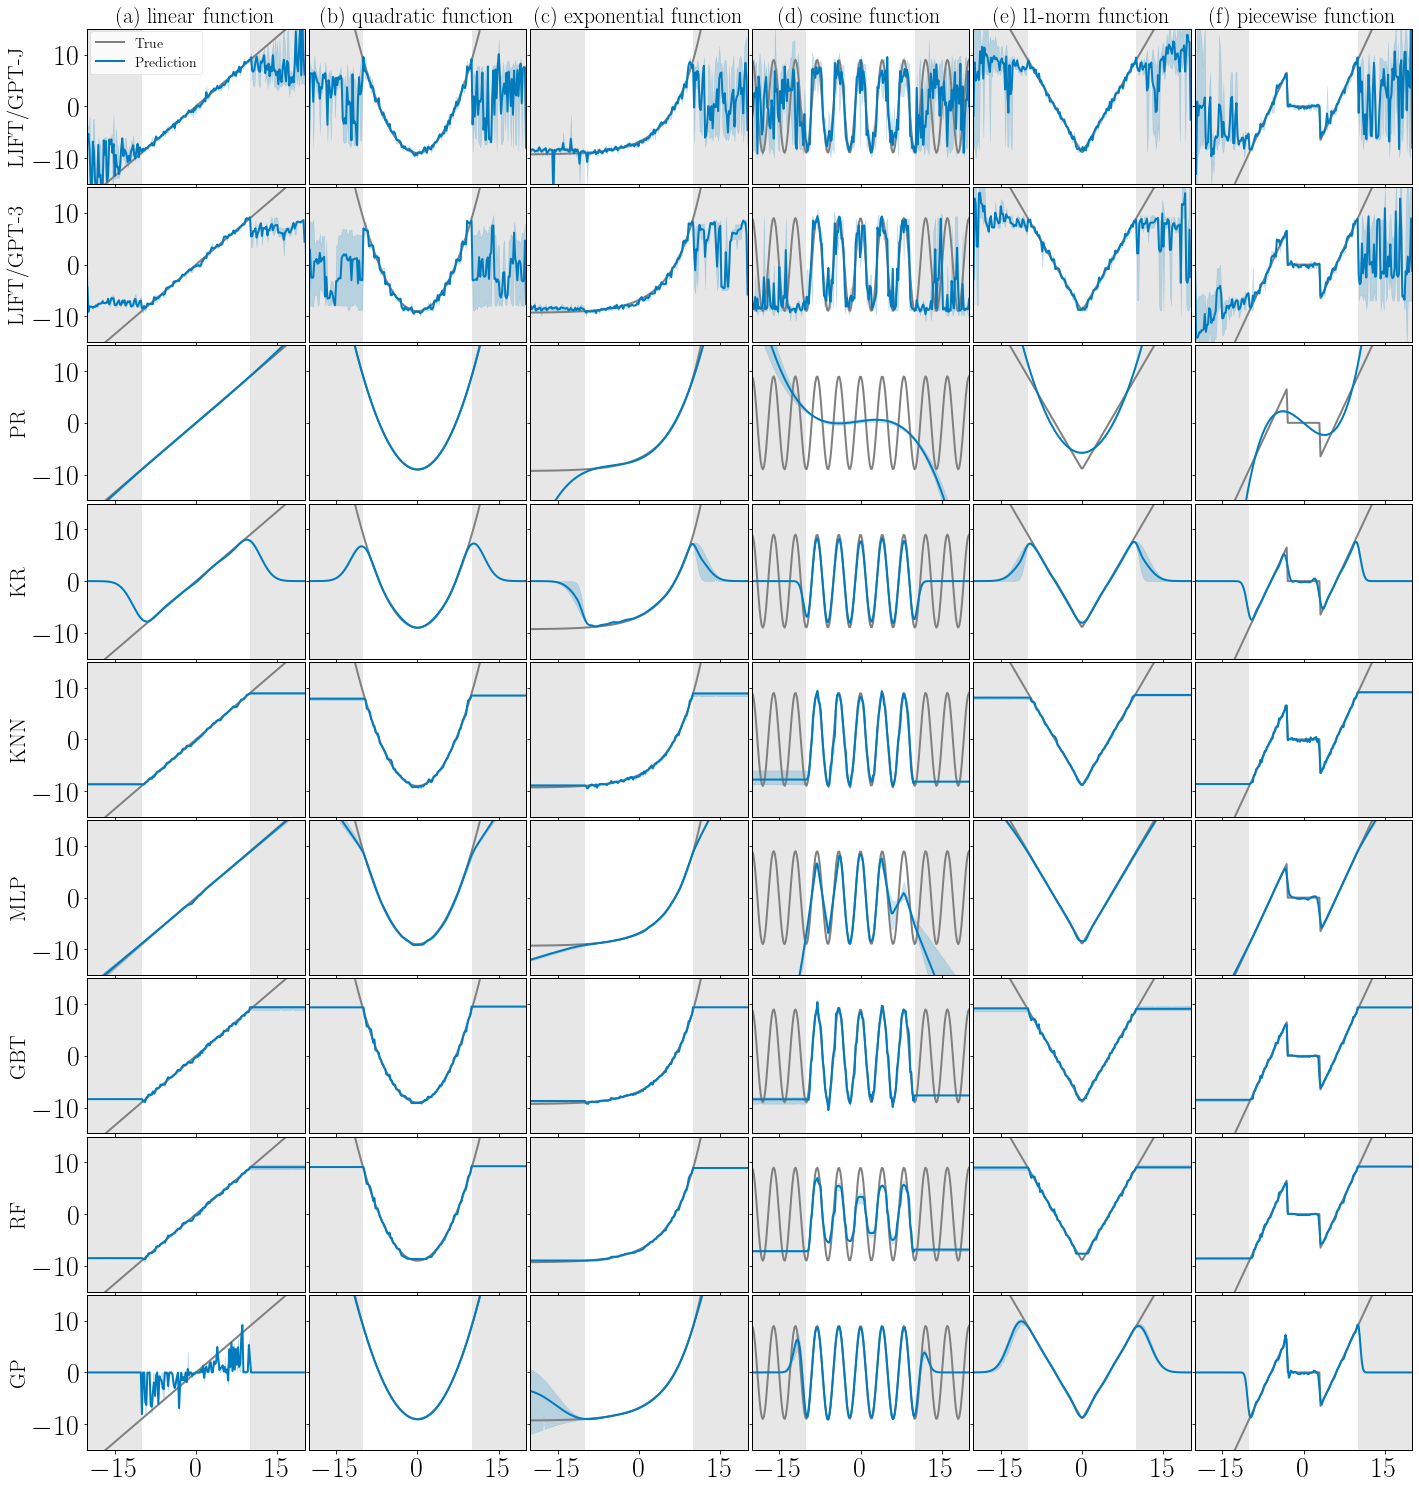

In [6]:
standard_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]
func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
method_list = ['LIFT/GPT-J', 'LIFT/GPT-3', 'PR', 'KR', 'KNN', 'MLP', 'GBT', 'RF', 'GP']
width = 20
height = 21

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=9, ncols=6, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.07, bottom=.03, right=0.99, top=0.97, wspace=0.02, hspace = 0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    file = standard_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    train_x, train_y, gptj_grid_y = [], [], []
    for sim_idx in range(3):
        if i == 0:
            folder = os.path.join('y=5.1x','data_%d' %(sim_idx+1))
        else:
            folder = os.path.join('accuracy','data_%d' %(sim_idx+1))
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        gptj_grid_y.append(data_json['gptj_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    gptj_grid_y = np.array(gptj_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    if i == 0:
        true_grid_y = np.array(true_grid_y).reshape(-1)/5.1*0.9
        gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)/5.1*0.9
        gptj_grid_y = np.array(gptj_grid_y).reshape(-1)/5.1*0.9

        invalid_idx = gpt3_grid_y == None
        gpt3_grid_y = gpt3_grid_y[~invalid_idx]

        qr_grid_y = np.array(qr_grid_y).reshape(-1)/5.1*0.9
        krr_grid_y = np.array(krr_grid_y).reshape(-1)/5.1*0.9
        knn_grid_y = np.array(knn_grid_y).reshape(-1)/5.1*0.9
        nn_grid_y = np.array(nn_grid_y).reshape(-1)/5.1*0.9
        xg_grid_y = np.array(xg_grid_y).reshape(-1)/5.1*0.9
        rf_grid_y = np.array(rf_grid_y).reshape(-1)/5.1*0.9
        gp_grid_y = np.array(gp_grid_y).reshape(-1)/5.1*0.9
        train_y = np.array(train_y).reshape(-1)/5.1*0.9
        grid_y = np.array(grid_y).reshape(-1)/5.1*0.9
    
    # background color
    for row in range(9):
        ax[row][i].set_facecolor('white')
        ax[row][i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
        ax[row][i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1)   
        ax[row][i].plot(grid_x, grid_y, label='True', linewidth = 2, color = 'gray')
        # ax[row][i].get_legend().remove()
        ax[row][i].set_xlim(-20,20)
        ax[row][i].set_xticks([-15, 0, 15])
        ax[row][i].set_ylim(-15,15)
        if i == 0: ax[row][i].set_ylabel(method_list[row], fontsize = 22)

    sns.color_palette("Set2")
    
    # plot lines
    sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[2][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KR', linewidth = 2, ax = ax[3][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[4][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = nn_grid_y, label='MLP', linewidth = 2, ax = ax[5][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = xg_grid_y, label='GBT', linewidth = 2, ax = ax[6][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[7][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[8][i], color = '#007CBE')

    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, label='Prediction', linewidth = 2, ax = ax[1][i], color = '#007CBE')
    sns.lineplot(x = other_grid_x, y = gptj_grid_y, label='Prediction', linewidth = 2, ax = ax[0][i], color = '#007CBE')
    
    for row in range(9):
        try:
            ax[row][i].get_legend().remove()
        except AttributeError:
            pass
    
    ax[0][i].set_title(func_list[i], fontsize = 22)

ax[0][0].legend(fontsize = 14, bbox_to_anchor=(0.56, 0.66), ncol = 1)
plt.savefig(os.path.join('figures','all_1d_reg.pdf'))
None

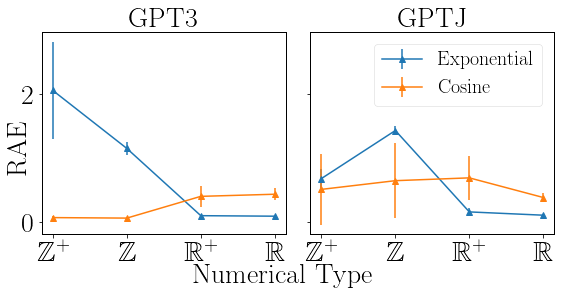

In [48]:
width = 8
height = 4

mean_df = pd.read_csv(os.path.join('accuracy', 'syn_mean_across_3sims.csv'))
std_df = pd.read_csv(os.path.join('accuracy', 'syn_std_across_3sims.csv'))

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
plt.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': r'\usepackage{amsfonts}'
})
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.08, bottom=.2, right=0.97, top=0.9, wspace=0.1) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

x = [1,2,3,4]
for func in ['exponential', 'cosine']:
    y, e, gptj_y, gptj_e = [], [], [], []
    for integer in [True, False]:
        for positive in [True, False]:
            if integer and positive:
                rg = '(0, 300)'
            elif (not integer) and positive:
                rg = '(0, 10)'
            elif integer and (not positive):
                rg = '(-150, 150)'
            else:
                rg = '(-10, 10)'
            # file = '%s_n_250_p_1_int_%d_(%.1f,%.1f)_noise_0.10_all.json' % (func, integer, rg[0], rg[1])
            idx = (mean_df.p == 1) & (mean_df.function == func) & (mean_df['(lb,ub)'] == rg) &(mean_df.noise_level == .1)
            y.append(mean_df[idx]['gpt3_loss'].item())
            e.append(std_df[idx]['gpt3_loss'].item())
            gptj_y.append(mean_df[idx]['gptj_loss'].item())
            gptj_e.append(std_df[idx]['gptj_loss'].item())
    ax[0].errorbar(x, y, e, linestyle='-', marker='^', label = func[0].upper() + func[1:])
    ax[1].errorbar(x, gptj_y, gptj_e, linestyle='-', marker='^', label = func[0].upper() + func[1:])
    
ax[0].set_title('GPT3', fontsize = 28)
ax[1].set_title('GPTJ', fontsize = 28)

ax[0].set_xticks(x)
ax[1].legend(fontsize = 20, bbox_to_anchor = (0.99, 0.99))
ax[0].set_xticklabels([r"$\mathbb{Z}^+$", r'$\mathbb{Z}$', r'$\mathbb{R}^+$', r'$\mathbb{R}$'])
fig.supylabel('RAE',fontsize = 28)
fig.supxlabel('Numerical Type', fontsize = 28)
plt.savefig('figures/reg_input.pdf')
None

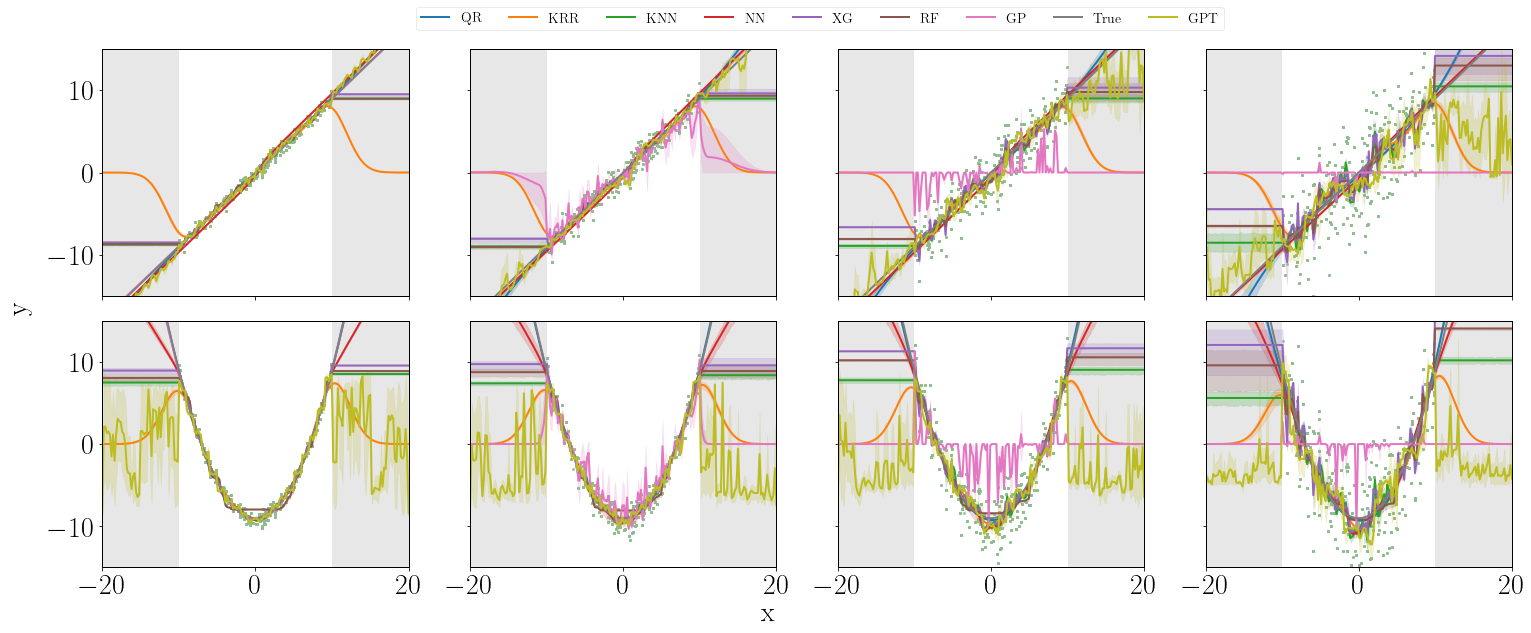

In [25]:
noise_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.20_all.json',
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.40_all.json',
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.80_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.20_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.40_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.80_all.json',
]

# func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
#             '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']
width = 22
height = 9

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=2, ncols=4, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.08, bottom=.1, right=0.97, top=0.9, wspace=0.2, hspace = 0.1) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(8):
    row = i // 4
    col = i % 4
    file = noise_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, gpt3_grid_x, other_grid_x, true_grid_y, xg_grid_y, rf_grid_y, gp_grid_y = [], [], [], [], [], [], [], [], [], [], []
    train_x, train_y = [], []
    for sim_idx in range(5):
        folder = 'accuracy/data_%d' %(sim_idx+1)
        with open(os.path.join(folder, file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])
    
        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        other_grid_x.append(grid_x)
    
        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])
        
        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])
    
    true_grid_y = np.array(true_grid_y).reshape(-1)
    
    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]
    
    # lr_grid_y = np.array(lr_grid_y).reshape(-1)
    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    # background color
    ax[row][col].set_facecolor('white')
    ax[row][col].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
    ax[row][col].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1)    
    sns.color_palette("Set2")
    
    # plot lines
    sns.lineplot(x = other_grid_x, y = qr_grid_y, label='QR', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = nn_grid_y, label='NN', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[row][col])
    sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[row][col])
    ax[row][col].plot(grid_x, grid_y, label='True', linewidth = 2)
    ax[row][col].scatter(train_x, train_y, s = 5, c = scatter_c)
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, label='GPT', linewidth = 2, ax = ax[row][col], palette = [gpt3_c])
    
    ax[row][col].get_legend().remove()
    # ax[row][col].set_title(func_list[i], fontsize = 25)
    ax[row][col].set_xlim(-20,20)
    ax[row][col].set_ylim(-15,15)
    
ax[0][0].legend(fontsize = 14, bbox_to_anchor=(1, 1.2), ncol = 9)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig('figures/noise_1d_reg.pdf')
None

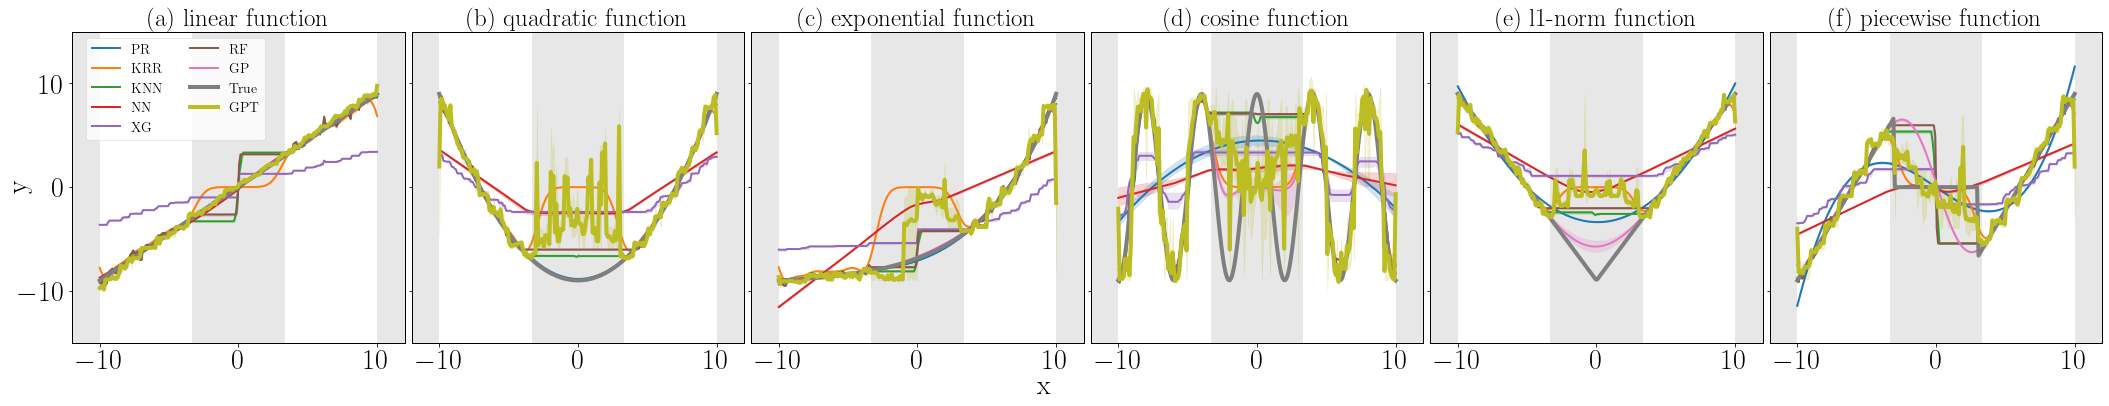

In [7]:
interpolate_list = [
    'linear_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'quadratic_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'exponential_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'cosine_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'l1norm_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
    'piecewise_n_250_p_1_int_0_(-10.0,10.0)_noise_0.10_all.json',
]

func_list = ['(a) linear function', '(b) quadratic function', '(c) exponential function',
            '(d) cosine function', '(e) l1-norm function', '(f) piecewise function']


width = 30
height = 6

plt.rc('font', family='serif', serif='times new roman')
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=28)
plt.rc('ytick', labelsize=28)
plt.rc('axes', labelsize=28)
plt.rc('axes', linewidth=1)
mpl.rcParams['patch.linewidth']=0.5 #width of the boundary of legend

fig, ax = plt.subplots(nrows=1, ncols=6, sharex=True, sharey=True) #plot two subgraphs in one figure, 1 by 2 size, sharing y-axis
fig.subplots_adjust(left=.05, bottom=.14, right=0.99, top=0.86, wspace=0.02) #margin of the figure
fig.set_size_inches(width, height) #exact size of the figure

#color setting#
true_c = 'black'
gpt3_c = 'limegreen'
lr_c = 'yellow'
qr_c = 'royalblue'
knn_c = 'darkviolet'
krr_c = 'peru'
nn_c = 'lightcoral'
###############

def get_mean(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.mean()

def get_std(row):
    row = np.array(list(filter(partial(is_not, None), row)))
    return row.std()
    
lb_ub = (-10, 10)
grid_int = (-20, 20)
for i in range(6):
    row = i // 3
    col = i % 3
    file = interpolate_list[i]
    
    gpt3_grid_y, qr_grid_y, knn_grid_y, krr_grid_y, nn_grid_y, xg_grid_y, rf_grid_y, gp_grid_y, gpt3_grid_x, other_grid_x, true_grid_y = [], [], [], [], [], [], [], [], [], [], []
    train_x, train_y = [], []
    for sim_idx in range(3):
        with open(os.path.join('donut/data_%d' % (sim_idx + 1), file), 'r') as f:
            data_json = json.load(f)
        grid_x = np.array(data_json['grid_x'])
        grid_y = np.array(data_json['grid_y'])

        true_grid_y.append(grid_y)
        # gpt3
        gpt3_grid_y.append(data_json['gpt3_grid_y'])
        other_grid_x.append(grid_x)

        # other
        qr_grid_y.append(data_json['poly_grid_y'])
        krr_grid_y.append(data_json['krr_grid_y'])
        knn_grid_y.append(data_json['knn_grid_y'])
        nn_grid_y.append(data_json['nn_grid_y'])
        xg_grid_y.append(data_json['xg_grid_y'])
        rf_grid_y.append(data_json['rf_grid_y'])
        gp_grid_y.append(data_json['gp_grid_y'])

        # train
        train_x.append(data_json['train_x'])
        train_y.append(data_json['train_y'])

    true_grid_y = np.array(true_grid_y).reshape(-1)

    gpt3_grid_y = np.array(gpt3_grid_y).reshape(-1)
    other_grid_x = np.array(other_grid_x).reshape(-1)

    invalid_idx = gpt3_grid_y == None
    gpt3_grid_y = gpt3_grid_y[~invalid_idx]
    gpt3_grid_x = other_grid_x[~invalid_idx]

    qr_grid_y = np.array(qr_grid_y).reshape(-1)
    krr_grid_y = np.array(krr_grid_y).reshape(-1)
    knn_grid_y = np.array(knn_grid_y).reshape(-1)
    nn_grid_y = np.array(nn_grid_y).reshape(-1)
    xg_grid_y = np.array(xg_grid_y).reshape(-1)
    rf_grid_y = np.array(rf_grid_y).reshape(-1)
    gp_grid_y = np.array(gp_grid_y).reshape(-1)
    
    train_x = np.array(train_x).reshape(-1)
    train_y = np.array(train_y).reshape(-1)
    
    # background color
    ax[i].set_facecolor('white')
    ax[i].axvspan(grid_int[0], lb_ub[0], facecolor='0.1', alpha=0.1)
    ax[i].axvspan(lb_ub[1], grid_int[1], facecolor='0.1', alpha=0.1)    
    ax[i].axvspan(-3.333333333333333, 3.333333333333333, facecolor='0.1', alpha=0.1)    
    sns.color_palette("Set2")
    
    # plot lines
    sns.lineplot(x = other_grid_x, y = qr_grid_y, label='PR', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = krr_grid_y, label='KRR', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = knn_grid_y, label='KNN', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = nn_grid_y, label='NN', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = xg_grid_y, label='XG', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = rf_grid_y, label='RF', linewidth = 2, ax = ax[i])
    sns.lineplot(x = other_grid_x, y = gp_grid_y, label='GP', linewidth = 2, ax = ax[i])
    ax[i].plot(grid_x, grid_y, label='True', linewidth = 4)
    sns.lineplot(x = gpt3_grid_x, y = gpt3_grid_y, label='GPT', linewidth = 4, ax = ax[i], palette = [gpt3_c])
    # ax[i].scatter(train_x, train_y, s = 5, c = scatter_c)
    
    ax[i].get_legend().remove()
    ax[i].set_title(func_list[i], fontsize = 25)
    ax[i].set_xlim(-12,12)
    ax[i].set_ylim(-15,15)
    
ax[0].legend(fontsize = 14, bbox_to_anchor=(0.6, 0.63), ncol = 2)
fig.supxlabel(r'$\mathrm{x}$',fontsize = 28)
fig.supylabel(r'$\mathrm{y}$', fontsize = 28)
plt.savefig('figures/1d_reg_interpolation.pdf')
None